In [2]:
import pandas as pd
import numpy as np
import sklearn as sklearn
import seaborn as sns
import matplotlib as pltlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

###### Lets read the data.

In [3]:
df = pd.read_csv('heart_dataset.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
Sorted_Data_by_age = df.sort_values(by="age")
Sorted_Data_by_age

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1


In [8]:
df.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [9]:
Heart_disease_counts = df['target'].value_counts()
print(Heart_disease_counts)



target
1    165
0    138
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_11908\3531136689.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Heart_disease_counts.index, y=Heart_disease_counts.values, palette=['skyblue', 'salmon'])


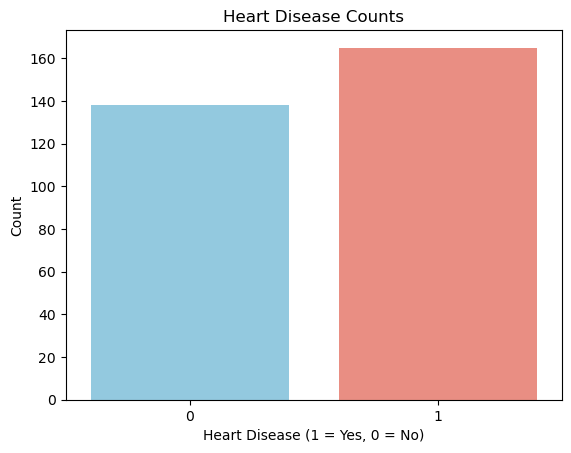

In [10]:
sns.barplot(x=Heart_disease_counts.index, y=Heart_disease_counts.values, palette=['skyblue', 'salmon'])
plt.title('Heart Disease Counts')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


In [11]:
pip install ydata_profiling


  Using cached visions-0.7.6-py3-none-any.whl (104 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


In [12]:
from ydata_profiling import ProfileReport

In [13]:
Profile = ProfileReport(df, explorative=True, title="Profiling Report")

In [14]:
Profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

###### Since the YData report tells that there is high correlation between Chest Pain (cp) and Thalium Stress Result (thal) with Heart Disease (target), lets make a scatter plot for evidence. ##

In [15]:
# Compare target column with cp column
pd.crosstab(df.target, df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


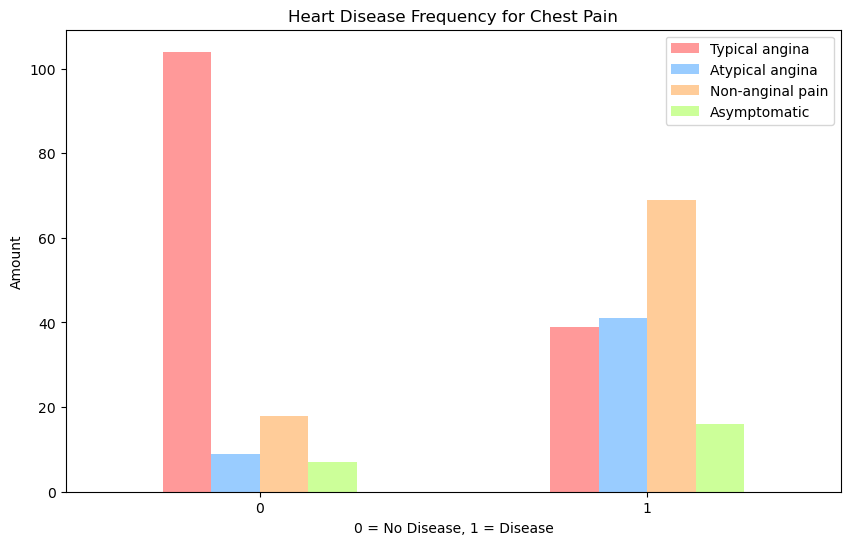

In [16]:
# Create a plot
pd.crosstab(df.target, df.cp).plot(kind="bar", figsize=(10,6), color=["#FF9999", "#99CCFF", "#FFCC99", "#CCFF99"])


# Add some attributes to it
plt.title("Heart Disease Frequency for Chest Pain")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Typical angina", "Atypical angina", "Non-anginal pain", "Asymptomatic"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical


In [18]:
# Compare target column with age column
pd.crosstab(df.target, df.cp)


cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


In [19]:

correlation = df['target'].corr(df['age'])
print("Correlation:", correlation)

Correlation: -0.22543871587483727


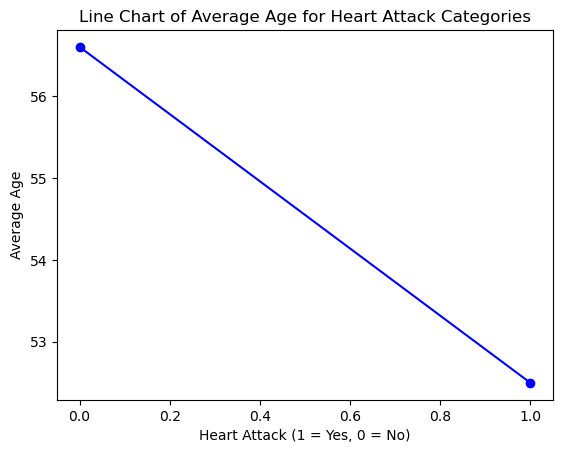

In [20]:
# Calculate the mean age for each target category
age_means = df.groupby('target')['age'].mean()

# Plotting the line chart
plt.plot(age_means.index, age_means.values, marker='o', linestyle='-', color='blue')

# Labeling the chart
plt.xlabel('Heart Attack (1 = Yes, 0 = No)')
plt.ylabel('Average Age')
plt.title('Line Chart of Average Age for Heart Attack Categories')
plt.show()


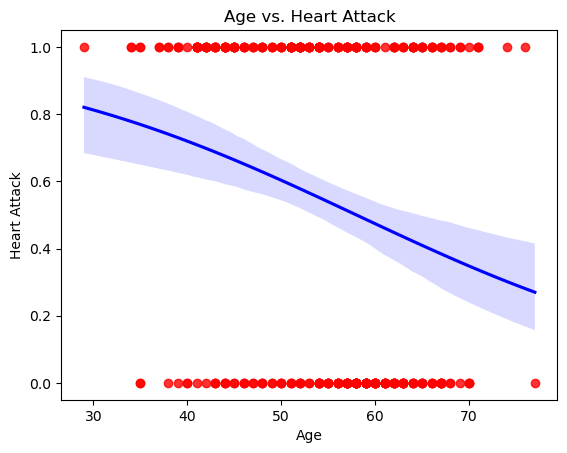

In [21]:

sns.regplot(x='age', y='target', data=df, logistic=True, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.xlabel("Age")
plt.ylabel("Heart Attack")
plt.title("Age vs. Heart Attack")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_11908\2566594934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Heart_disease_counts.index, y=Heart_disease_counts.values, palette=['skyblue', 'salmon'])


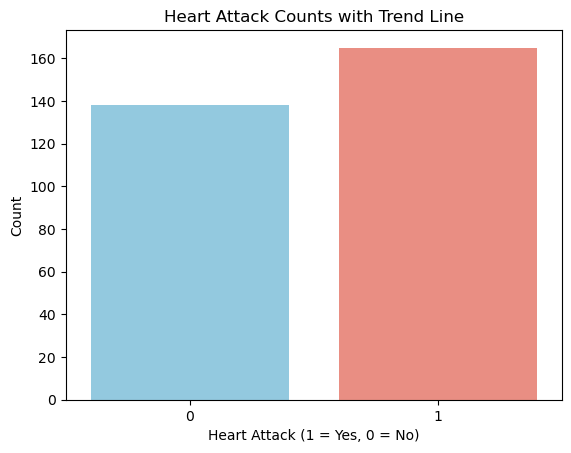

In [26]:

# Plotting the bar plot
sns.barplot(x=Heart_disease_counts.index, y=Heart_disease_counts.values, palette=['skyblue', 'salmon'])



plt.title('Heart Attack Counts with Trend Line')
plt.xlabel('Heart Attack (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


In [27]:
# Compare target column with cp column
pd.crosstab(df.target, df.thal)

thal,0,1,2,3
target,,,,
0,1,12,36,89
1,1,6,130,28


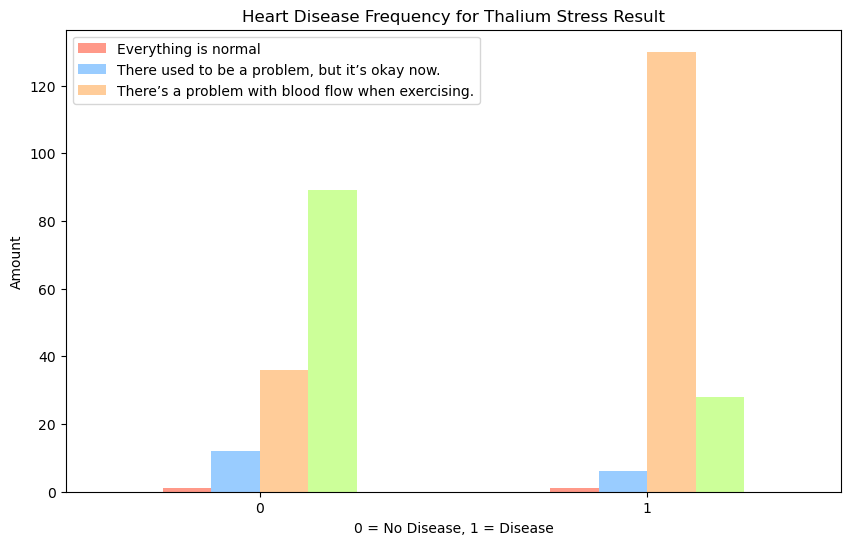

In [28]:
# Create a plot
pd.crosstab(df.target, df.thal).plot(kind="bar", figsize=(10,6), color=["#FF9989", "#99CCFF", "#FFCC99", "#CCFF99"])


# Add some attributes to it
plt.title("Heart Disease Frequency for Thalium Stress Result")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Everything is normal", "There used to be a problem, but it’s okay now.", "There’s a problem with blood flow when exercising."])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical


## Modeling

In [31]:

X = df.drop("target", axis=1)

# Target variable
y = df.target.values

In [32]:
X, y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

### Training and test split

In [34]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables
                                                    y, # dependent variable
                                                    test_size = 0.25) # percentage of data to use for test set

In [35]:
y_train, len(y_train)

(array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
        0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 0, 1, 1, 0, 1], dtype=int64),
 227)

In [36]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

###### I just found this out.

The number 42 is often used humorously as it is famously referred to as "the answer to life, the universe, and everything" from Douglas Adams' The Hitchhiker's Guide to the Galaxy. However, you can use any integer for the seed; the key point is consistency.

And its hillarious!!!

In [37]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (ma

{'Logistic Regression': 0.881578947368421}

In [38]:
from sklearn.metrics import classification_report

# Fit the model (make sure to have your model already trained)
model = models["Logistic Regression"]  # Access your model from the dictionary
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.83      0.87        35
           1       0.86      0.93      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (ma